In [1]:
import re
import pandas as pd
import pickle as pkl
import numpy as np
from collections import Counter 
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

we observe the occurrence of words like `french`, `place`, `foreign` or `abbrev` following some phonetic spellings. after closer investigation, it's clear that these are comments to provide context on words or explain their origins, i.e. whether they're an abbreviation commonly used but spoken aloud like "HIV" or words of other origin like _French_ or _German_. We'll likely want to drop these words. NOTE: they're all preceded by `#`

In [2]:
def parse_dict(file_path, normalize=False):
    with open(file_path) as f:
        lines = f.readlines()
    cmudict = dict()
    phone_freq = Counter()
    for line in lines:
        pairs = line.strip('\n').split(' ', 1)
        if normalize:
            pairs = list(map(str.lower, pairs))
        if '#' in pairs[1]:
            continue
        else:
            cmudict[pairs[0]] = pairs[1]
            phone_freq += Counter(pairs[1].split(' '))
    return cmudict, phone_freq

In [3]:
cmudict, phone_freq = parse_dict('../data/cmudict/cmudict.dict', normalize=True)

In [4]:
phone_freq

Counter({'b': 21440,
         'aw1': 2346,
         't': 49088,
         'k': 43098,
         'ah0': 63152,
         'z': 28243,
         'ao1': 8178,
         'r': 46479,
         's': 50451,
         'y': 5266,
         'uw1': 6716,
         'm': 29748,
         'f': 13970,
         'ih1': 15771,
         'ow0': 8215,
         'g': 13690,
         'eh1': 20851,
         'n': 61246,
         'ey1': 9362,
         'd': 32569,
         'l': 49985,
         'w': 8986,
         'ah1': 6877,
         'ey2': 3418,
         'iy1': 10321,
         'ih2': 4462,
         'p': 19991,
         'aa1': 16963,
         'er0': 23965,
         'ao0': 1505,
         'aa2': 3369,
         'eh0': 2929,
         'th': 2943,
         'ao2': 1886,
         'aa0': 4966,
         'v': 10810,
         'hh': 9379,
         'iy2': 2640,
         'ae1': 16911,
         'ow2': 2459,
         'iy0': 22153,
         'ih0': 30210,
         'ae2': 3408,
         'ow1': 8670,
         'ng': 9987,
         'sh': 8814,
 

In [5]:
phones = []
freqs = []
for phone, freq in phone_freq.most_common():
    phones.append(phone)
    freqs.append(freq)

<AxesSubplot:title={'center':'CMU Dict Phoneme Distribution'}, xlabel='Frequency', ylabel='Phoneme'>

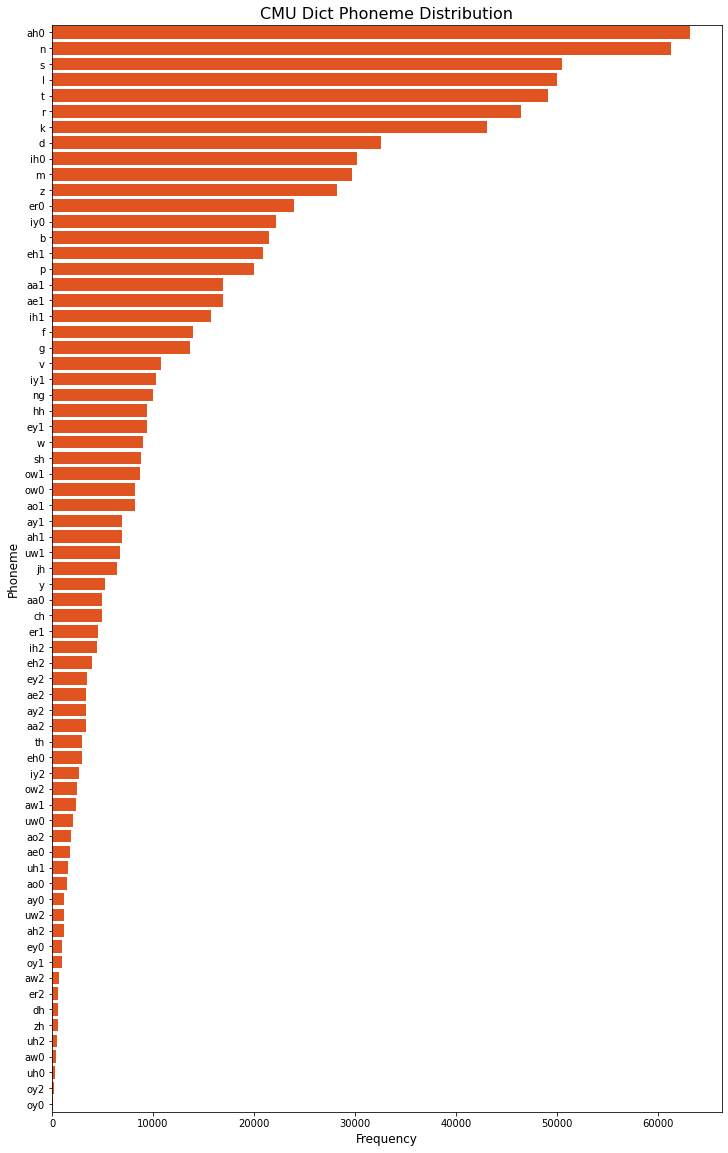

In [6]:
fig = plt.figure(figsize=(12,20))
plt.title('CMU Dict Phoneme Distribution', fontsize=16)
plt.ylabel('Phoneme', fontsize=12)
plt.xlabel('Frequency', fontsize=12)
sns.barplot(y=pd.Series(phones), x=pd.Series(freqs), orient='h', color='orangered')
# fig.savefig('cmudict_dist.png', dpi = fig.dpi, facecolor=(1,1,1,1))

<AxesSubplot:title={'center':'CMU Dict Phoneme Distribution'}, xlabel='Proportion', ylabel='Phoneme'>

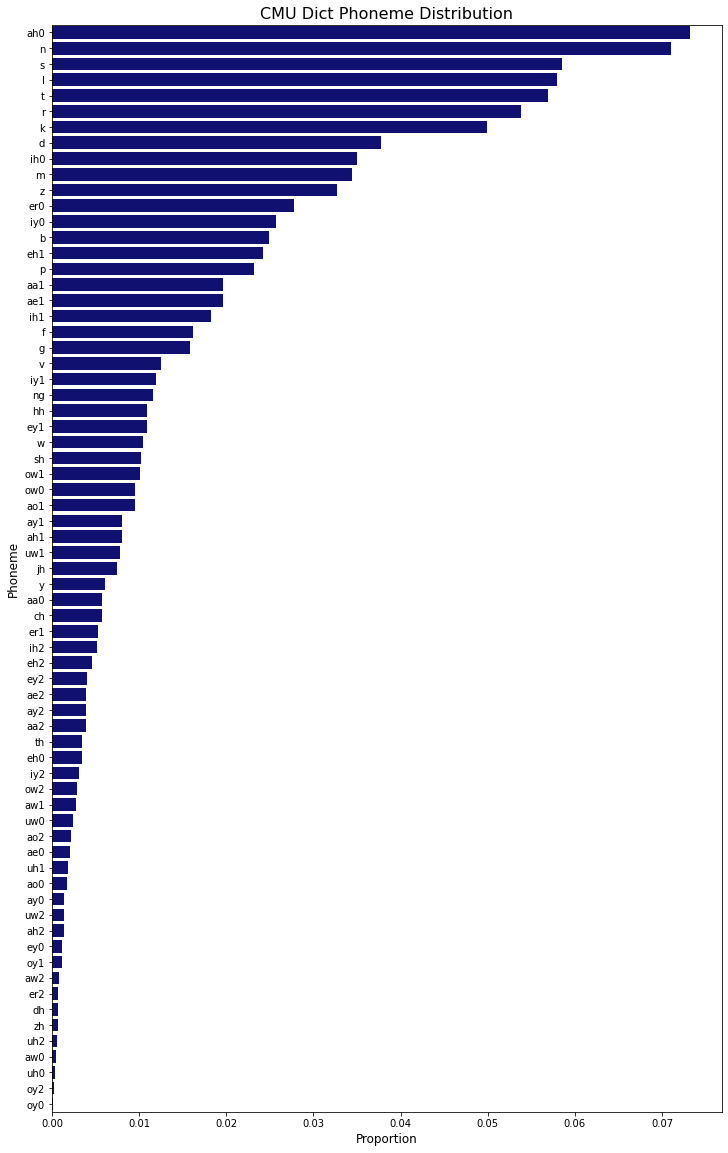

In [7]:
fig = plt.figure(figsize=(12,20))
plt.title('CMU Dict Phoneme Distribution', fontsize=16)
plt.ylabel('Phoneme', fontsize=12)
plt.xlabel('Proportion', fontsize=12)
sns.barplot(y=pd.Series(phones), x=pd.Series(np.divide(freqs, sum(freqs))), orient='h', color='Navy')
# fig.savefig('cmudict_dist_rel_props.png', dpi = fig.dpi, facecolor=(1,1,1,1))

# Phoneme compatability tests

In [12]:
def jaccard_similarity(dict1, dict2, include_stressor=True):
    if not include_stressor:
        dict1_keys = set([i for i in dict1.keys() if not re.search(r'\d', i)])
        dict2_keys = set([i for i in dict2.keys() if not re.search(r'\d', i)])
    else:
        dict1_keys = set(dict1.keys())
        dict2_keys = set(dict2.keys())
    intersection = dict1_keys.intersection(dict2_keys)
    union = dict1_keys.union(dict2_keys)
    print('Jaccard similarity: {:.3f}'.format(len(intersection)/len(union)))
    print('Shared phonemes: {}'.format(intersection))
    print('All phonemes: {}'.format(union))

## English-French phoneme compatibility

In [13]:
fr_dict, fr_phones_freq = parse_dict('../../Downloads/fr.dict', normalize=True)

In [14]:
jaccard_similarity(phone_freq, fr_phones_freq)

Jaccard similarity: 0.010
Shared phonemes: {'ch'}
All phonemes: {'', 'uh0', 'ow1', 'kk', 'll', 'w', 'ch', 'v', 'gg', 'ae1', 'ao0', 'uu', 'b', 'in', 'an', 'au', 'aa2', 'p', 'oo', 'ay1', 'iy2', 'oe', 'ay2', 'ah1', 'eh2', 'dd', 'er1', 'zz', 'oy2', 'jj', 'bb', 'f', 'n', 'g', 'ai', 'ey0', 'iy0', 'mm', 'iy1', 'm', 'eu', 'aw2', 'nn', 'er0', 'uw0', 'sh', 's', 'uh2', 'ay0', 't', 'aa1', 'hh', 'ah2', 'rr', 'ey1', 'ae0', 'aw0', 'aa', 'oy0', 'ff', 'oy1', 'yy', 'tt', 'th', 'uh1', 'ss', 'l', 'er2', 'ee', 'ou', 'uy', 'ei', 'ao1', 'ih1', 'vv', 'uw2', 'uw1', 'gn', 'aa0', 'ih2', 'eh0', 'eh1', 'on', 'ae2', 'zh', 'z', 'dh', 'pp', 'ow0', 'ii', 'ow2', 'aw1', 'ww', 'd', 'y', 'ao2', 'ih0', 'ah0', 'ey2', 'un', 'jh', 'ng', 'r', 'k'}


In [15]:
jaccard_similarity(phone_freq, fr_phones_freq, include_stressor=False)

Jaccard similarity: 0.017
Shared phonemes: {'ch'}
All phonemes: {'', 'eu', 'nn', 'sh', 's', 'kk', 'll', 't', 'hh', 'w', 'rr', 'ch', 'v', 'gg', 'aa', 'uu', 'b', 'ff', 'yy', 'tt', 'in', 'an', 'th', 'ss', 'ee', 'l', 'p', 'au', 'ou', 'oo', 'uy', 'ei', 'oe', 'vv', 'dd', 'zz', 'gn', 'jj', 'on', 'zh', 'z', 'dh', 'bb', 'pp', 'ii', 'f', 'n', 'g', 'ww', 'd', 'ai', 'y', 'un', 'mm', 'jh', 'ng', 'm', 'r', 'k'}


## English-Italian phoneme compatibility

In [16]:
it_dict, it_phone_freq = parse_dict('../../Downloads/voxforge_it_sphinx.dic', normalize=True)

In [17]:
jaccard_similarity(phone_freq, it_phone_freq)

Jaccard similarity: 0.176
Shared phonemes: {'n', 'b', 'f', 'g', 's', 'd', 't', 'w', 'k', 'l', 'p', 'v', 'm', 'ng', 'r', 'z'}
All phonemes: {'', 'uh0', 'ow1', 'll', 'w', 'ch', 'v', 'e1', 'ae1', 'ao0', 'b', 'dzz', 'aa2', 'o1', 'o', 'p', 'oo', 'tss', 'ay1', 'e', 'iy2', 'u', 'ay2', 'ah1', 'eh2', 'er1', 'oy2', 'jj', 'dz', 'f', 'n', 'g', 'ey0', 'iy0', 'iy1', 'm', 'nf', 'i', 'aw2', 'er0', 'uw0', 'sh', 's', 'uh2', 'ay0', 't', 'aa1', 'hh', 'ah2', 'ey1', 'ae0', 'a', 'aw0', 'ts', 'oy0', 'oy1', 'th', 'uh1', 'ee', 'l', 'er2', 'ss', 'j', 'ao1', 'ih1', 'a1', 'u1', 'uw2', 'uw1', 'aa0', 'ih2', 'eh0', 'eh1', 'ae2', 'zh', 'z', 'dh', 'ow0', 'ow2', 'aw1', 'd', 'y', 'ao2', 'ih0', 'ah0', 'ey2', 'i1', 'jh', 'ng', 'r', 'k'}


In [18]:
jaccard_similarity(phone_freq, it_phone_freq, include_stressor=False)

Jaccard similarity: 0.390
Shared phonemes: {'f', 'b', 'n', 'g', 's', 'd', 't', 'w', 'k', 'l', 'p', 'v', 'm', 'ng', 'r', 'z'}
All phonemes: {'', 'i', 'nf', 'sh', 's', 'll', 't', 'hh', 'w', 'ch', 'v', 'a', 'ts', 'b', 'dzz', 'th', 'ee', 'ss', 'l', 'p', 'o', 'oo', 'tss', 'e', 'u', 'j', 'jj', 'zh', 'z', 'dh', 'dz', 'f', 'n', 'g', 'd', 'y', 'jh', 'ng', 'm', 'r', 'k'}


## English-Russian phoneme compatibility

In [19]:
ru_dict, ru_phone_freq = parse_dict('../../Downloads/ru.dic', normalize=True)

In [20]:
jaccard_similarity(phone_freq, ru_phone_freq)

Jaccard similarity: 0.170
Shared phonemes: {'n', 'b', 'f', 'sh', 's', 'd', 'g', 't', 'k', 'ch', 'l', 'p', 'v', 'm', 'zh', 'r', 'z'}
All phonemes: {'u0', 'uh0', 'ow1', 'w', 'ch', 'fj', 'v', 'e1', 'ae1', 'ao0', 'b', 'kj', 'pj', 'aa2', 'o1', 'y1', 'p', 'gj', 'ay1', 'iy2', 'rj', 'h', 'ay2', 'ah1', 'eh2', 'hj', 'er1', 'oy2', 'e0', 'sch', 'c', 'f', 'n', 'g', 'lj', 'ey0', 'iy0', 'iy1', 'm', 'aw2', 'er0', 'uw0', 'a0', 'sh', 's', 'uh2', 'ay0', 't', 'aa1', 'hh', 'ah2', 'ey1', 'ae0', 'aw0', 'o0', 'oy0', 'oy1', 'sj', 'tj', 'th', 'uh1', 'l', 'er2', 'mj', 'j', 'zj', 'ao1', 'ih1', 'a1', 'dj', 'u1', 'uw2', 'uw1', 'nj', 'aa0', 'ih2', 'eh0', 'eh1', 'ae2', 'zh', 'z', 'dh', 'ow0', 'ow2', 'aw1', 'vj', 'd', 'i0', 'y', 'y0', 'ao2', 'ih0', 'ah0', 'ey2', 'i1', 'jh', 'ng', 'bj', 'r', 'k'}


In [21]:
jaccard_similarity(phone_freq, ru_phone_freq, include_stressor=False)

Jaccard similarity: 0.395
Shared phonemes: {'f', 'b', 'n', 'sh', 's', 'g', 'd', 't', 'k', 'ch', 'l', 'p', 'v', 'm', 'zh', 'r', 'z'}
All phonemes: {'sh', 's', 't', 'hh', 'w', 'ch', 'fj', 'v', 'b', 'sj', 'kj', 'tj', 'th', 'pj', 'l', 'p', 'gj', 'mj', 'rj', 'h', 'j', 'zj', 'dj', 'hj', 'nj', 'zh', 'sch', 'z', 'dh', 'c', 'f', 'n', 'g', 'lj', 'd', 'vj', 'y', 'jh', 'ng', 'm', 'bj', 'r', 'k'}


## English-Portuguese phoneme compatibility

In [22]:
pt_dict, pt_phone_freq = parse_dict('../../Downloads/br-pt.dic', normalize=True)

In [23]:
jaccard_similarity(phone_freq, pt_phone_freq)

Jaccard similarity: 0.174
Shared phonemes: {'f', 'b', 'n', 'g', 's', 'd', 't', 'w', 'k', 'l', 'p', 'v', 'm', 'r', 'z'}
All phonemes: {'', 'uh0', 'ow1', 'w', 'ch', 'v', 'ae1', 'ao0', 'b', 'aa2', 'o', 'p', 'u~', 'ay1', 'e', 'iy2', 'u', 'ay2', 'ah1', 'eh2', 'er1', 'oy2', 'dz', 'f', 'n', 'g', 'o~', 'j~', 'ey0', 'e~', 'iy0', 'a~', 'iy1', 'm', 'i', 'aw2', 'er0', 'uw0', 'sh', 's', 'uh2', 'ay0', 'i~', 't', 'aa1', 'hh', 'ah2', 'ey1', 'ae0', 'a', 'aw0', 'ts', 'oy0', 'w~', 'oy1', 'th', 'uh1', 'l', 'er2', 'j', 'ao1', 'ih1', 'uw2', 'uw1', 'aa0', 'ih2', 'eh0', 'eh1', 'ae2', 'zh', 'z', 'dh', 'ow0', 'ow2', 'aw1', 'd', 'x', 'y', 'ao2', 'ih0', 'ah0', 'ey2', 'jh', 'ng', 'r', 'k'}


In [24]:
jaccard_similarity(phone_freq, pt_phone_freq, include_stressor=False)

Jaccard similarity: 0.366
Shared phonemes: {'f', 'b', 'n', 'g', 's', 'd', 't', 'w', 'k', 'l', 'p', 'v', 'm', 'r', 'z'}
All phonemes: {'', 'i', 'sh', 's', 'i~', 't', 'hh', 'w', 'ch', 'v', 'a', 'ts', 'w~', 'b', 'th', 'l', 'p', 'o', 'u~', 'e', 'u', 'j', 'zh', 'z', 'dh', 'dz', 'f', 'n', 'g', 'o~', 'd', 'j~', 'x', 'y', 'e~', 'a~', 'jh', 'ng', 'm', 'r', 'k'}


# (Wikipron data)
# IPA-to-ARPAbet 

In [25]:
from ipapy.arpabetmapper import ARPABETMapper
amapper = ARPABETMapper()  
amapper.map_unicode_string(u'ˈɛn iˌwʌn', ignore=True, return_as_list=True)

['EH', 'N', 'IH', 'W', 'AH', 'N']

In [26]:
def parse_wikipron(filepath):
    amapper = ARPABETMapper()  
    df = pd.read_csv(filepath, encoding='utf-8', sep='\t', header=None)
    df['ARPAbet'] = df[1].map(lambda row: ' '.join(amapper.map_unicode_string(row, ignore=True, return_as_list=True)))
    phone_freq = Counter()
    for arpa in df['ARPAbet']:
        phone_freq += Counter(arpa.lower().split(' '))
    return phone_freq

## English-Icelandic phoneme compatibility

In [27]:
ic_phone_freq = parse_wikipron('../../Downloads/ice_latn_broad.tsv')

In [28]:
jaccard_similarity(phone_freq, ic_phone_freq, include_stressor=False)

Jaccard similarity: 0.594
Shared phonemes: {'s', 't', 'hh', 'w', 'v', 'b', 'th', 'l', 'p', 'dh', 'f', 'n', 'g', 'd', 'y', 'ng', 'm', 'r', 'k'}
All phonemes: {'sh', 's', 'oh', 't', 'hh', 'w', 'ch', 'v', 'ao', 'dx', 'b', 'uw', 'th', 'l', 'p', 'eh', 'ih', 'zh', 'ae', 'z', 'dh', 'uh', 'f', 'n', 'g', 'd', 'y', 'jh', 'ng', 'm', 'r', 'k'}


In [29]:
jaccard_similarity(phone_freq, ic_phone_freq)

Jaccard similarity: 0.247
Shared phonemes: {'s', 't', 'hh', 'w', 'v', 'b', 'th', 'l', 'p', 'dh', 'n', 'f', 'g', 'd', 'y', 'ng', 'm', 'r', 'k'}
All phonemes: {'uh0', 'ow1', 'w', 'ch', 'v', 'ae1', 'ao0', 'b', 'aa2', 'p', 'ay1', 'iy2', 'ay2', 'ah1', 'eh2', 'er1', 'oy2', 'f', 'n', 'g', 'ey0', 'iy0', 'iy1', 'm', 'aw2', 'er0', 'uw0', 'sh', 's', 'uh2', 'ay0', 'oh', 't', 'aa1', 'hh', 'ah2', 'ey1', 'ae0', 'ao', 'aw0', 'dx', 'oy0', 'oy1', 'uw', 'th', 'uh1', 'l', 'er2', 'ih', 'ao1', 'ih1', 'uw2', 'uw1', 'aa0', 'ih2', 'eh0', 'eh1', 'ae2', 'zh', 'ae', 'z', 'dh', 'uh', 'ow0', 'ow2', 'aw1', 'd', 'y', 'ao2', 'ih0', 'ah0', 'ey2', 'jh', 'ng', 'eh', 'r', 'k'}


## English-Portuguese phoneme compatibility

In [30]:
por_phone_freq = parse_wikipron('../../Downloads/por_latn_po_broad.tsv')

In [31]:
jaccard_similarity(phone_freq, por_phone_freq, include_stressor=False)

Jaccard similarity: 0.639
Shared phonemes: {'sh', 's', 't', 'hh', 'w', 'ch', 'v', 'b', 'l', 'p', 'zh', 'dh', 'z', 'f', 'n', 'g', 'd', 'y', 'jh', 'ng', 'm', 'r', 'k'}
All phonemes: {'', 'sh', 's', 'oh', 't', 'hh', 'w', 'ch', 'ix', 'v', 'ao', 'aa', 'dx', 'b', 'uw', 'th', 'l', 'p', 'eh', 'ih', 'ax', 'zh', 'ae', 'z', 'dh', 'uh', 'f', 'n', 'g', 'd', 'y', 'jh', 'ng', 'm', 'r', 'k'}


In [32]:
jaccard_similarity(phone_freq, por_phone_freq)

Jaccard similarity: 0.284
Shared phonemes: {'sh', 's', 't', 'hh', 'w', 'ch', 'v', 'b', 'l', 'p', 'zh', 'dh', 'z', 'f', 'n', 'g', 'd', 'y', 'jh', 'ng', 'm', 'r', 'k'}
All phonemes: {'', 'uh0', 'ow1', 'w', 'ch', 'v', 'ae1', 'ao0', 'b', 'aa2', 'p', 'ay1', 'iy2', 'ay2', 'ah1', 'eh2', 'er1', 'oy2', 'f', 'n', 'g', 'ey0', 'iy0', 'iy1', 'm', 'aw2', 'er0', 'uw0', 'sh', 's', 'uh2', 'ay0', 'oh', 't', 'aa1', 'hh', 'ah2', 'ix', 'ey1', 'ae0', 'ao', 'aw0', 'aa', 'dx', 'oy0', 'oy1', 'uw', 'th', 'uh1', 'l', 'er2', 'ih', 'ao1', 'ih1', 'uw2', 'uw1', 'ax', 'aa0', 'ih2', 'eh0', 'eh1', 'ae2', 'zh', 'ae', 'z', 'dh', 'uh', 'ow0', 'ow2', 'aw1', 'd', 'y', 'ao2', 'ih0', 'ah0', 'ey2', 'jh', 'ng', 'eh', 'r', 'k'}


## English-Romanian phoneme compatibility

In [34]:
rom_phone_freq = parse_wikipron('../../Downloads/rum_latn_narrow.tsv')

In [35]:
jaccard_similarity(phone_freq, rom_phone_freq, include_stressor=False)

Jaccard similarity: 0.688
Shared phonemes: {'sh', 's', 't', 'hh', 'w', 'ch', 'v', 'b', 'l', 'p', 'zh', 'z', 'f', 'n', 'g', 'd', 'y', 'jh', 'ng', 'm', 'r', 'k'}
All phonemes: {'sh', 's', 'oh', 't', 'hh', 'w', 'ch', 'ix', 'v', 'dx', 'b', 'uw', 'th', 'l', 'p', 'eh', 'ih', 'ax', 'zh', 'ae', 'z', 'dh', 'f', 'n', 'g', 'd', 'y', 'jh', 'ng', 'm', 'r', 'k'}


In [36]:
jaccard_similarity(phone_freq, rom_phone_freq)

Jaccard similarity: 0.286
Shared phonemes: {'sh', 's', 't', 'hh', 'w', 'ch', 'v', 'b', 'l', 'p', 'zh', 'z', 'n', 'f', 'g', 'd', 'y', 'jh', 'ng', 'm', 'r', 'k'}
All phonemes: {'uh0', 'ow1', 'w', 'ch', 'v', 'ae1', 'ao0', 'b', 'aa2', 'p', 'ay1', 'iy2', 'ay2', 'ah1', 'eh2', 'er1', 'oy2', 'f', 'n', 'g', 'ey0', 'iy0', 'iy1', 'm', 'aw2', 'er0', 'uw0', 'sh', 's', 'uh2', 'ay0', 'oh', 't', 'aa1', 'hh', 'ah2', 'ix', 'ey1', 'ae0', 'aw0', 'dx', 'oy0', 'oy1', 'uw', 'th', 'uh1', 'l', 'er2', 'ih', 'ao1', 'ih1', 'uw2', 'uw1', 'ax', 'aa0', 'ih2', 'eh0', 'eh1', 'ae2', 'zh', 'ae', 'z', 'dh', 'ow0', 'ow2', 'aw1', 'd', 'y', 'ao2', 'ih0', 'ah0', 'ey2', 'jh', 'ng', 'eh', 'r', 'k'}


## English-Czech phoneme compatability

In [37]:
cze_phone_freq = parse_wikipron('../../Downloads/cze_latn_narrow.tsv')

In [38]:
jaccard_similarity(phone_freq, cze_phone_freq, include_stressor=False)

Jaccard similarity: 0.568
Shared phonemes: {'sh', 's', 't', 'w', 'ch', 'v', 'b', 'l', 'p', 'zh', 'z', 'f', 'n', 'g', 'd', 'y', 'jh', 'ng', 'm', 'r', 'k'}
All phonemes: {'', 'sh', 's', 'oh', 't', 'hh', 'w', 'ch', 'el', 'v', 'ao', 'dx', 'b', 'uw', 'th', 'l', 'p', 'eh', 'ih', 'q', 'em', 'zh', 'ae', 'z', 'dh', 'uh', 'f', 'n', 'g', 'd', 'y', 'en', 'jh', 'ng', 'm', 'r', 'k'}


In [39]:
jaccard_similarity(phone_freq, cze_phone_freq)

Jaccard similarity: 0.256
Shared phonemes: {'sh', 's', 't', 'w', 'ch', 'v', 'b', 'l', 'p', 'zh', 'z', 'n', 'f', 'g', 'd', 'y', 'jh', 'ng', 'm', 'r', 'k'}
All phonemes: {'', 'uh0', 'ow1', 'w', 'ch', 'v', 'ae1', 'ao0', 'b', 'aa2', 'p', 'ay1', 'iy2', 'ay2', 'ah1', 'eh2', 'er1', 'oy2', 'f', 'n', 'g', 'ey0', 'iy0', 'iy1', 'm', 'aw2', 'er0', 'uw0', 'sh', 's', 'uh2', 'ay0', 'oh', 't', 'aa1', 'hh', 'ah2', 'ey1', 'ae0', 'el', 'ao', 'aw0', 'dx', 'oy0', 'oy1', 'uw', 'th', 'uh1', 'l', 'er2', 'ih', 'q', 'em', 'ao1', 'ih1', 'uw2', 'uw1', 'aa0', 'ih2', 'eh0', 'eh1', 'ae2', 'zh', 'ae', 'z', 'dh', 'uh', 'ow0', 'ow2', 'aw1', 'd', 'y', 'ao2', 'ih0', 'ah0', 'ey2', 'en', 'jh', 'ng', 'eh', 'r', 'k'}
